In [2]:
 #* for data manipulation 
import pandas as pd 
import numpy as np 

from disk_analysis_tools import tiling_disk_plots as tdp
from disk_analysis_tools import tiling_disk_utils as tdu

#* for plotting: 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set_theme(style="ticks")
sns.set_context("notebook")


Analysis of microscope triplet data to gain insight about the glue distribution along the edges

In [3]:
from pathlib import Path
measurement_folder  = Path.cwd().parent / 'excel_data'

In [4]:
trip_v3_data = pd.read_excel(measurement_folder/'mikriskop_gap_auswertung_run3.xlsx', sheet_name='trip_v3', header=3)
trip_v4_data = pd.read_excel(measurement_folder/'mikriskop_gap_auswertung_run4.xlsx', sheet_name='trip_v3', header=3)
trip_v6_data = pd.read_excel(measurement_folder/'mikriskop_gap_auswertung_run6.xlsx', sheet_name='trip_v3', header=3)
trip_v7_data = pd.read_excel(measurement_folder/'mikriskop_gap_auswertung_run7.xlsx', sheet_name='trip_v3', header=3)


In [5]:
trip_v3_data['syringe_tip'] = 'pink'
trip_v4_data['syringe_tip'] = 'pink'
trip_v6_data['syringe_tip'] = 'blue'
trip_v7_data['syringe_tip'] = 'blue'

In [6]:
trip_v3_data.drop("Unnamed: 0", axis=1, inplace=True)
trip_v4_data.drop("Unnamed: 0", axis=1, inplace=True)
trip_v6_data.drop("Unnamed: 0", axis=1, inplace=True)
trip_v7_data.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
trip_v3_data.head(3)

,Triplet,oben/unten,Himmelsrichtung,Punkt ID,Gap_tiefe_absolut µm,plane_differenz µm,gap_relative,vel,triplets_version,glue_width_plane_to_plane µm,glue_width_peak_to_peak µm,syringe_tip
0,blau,oben,NO,"1 (NO, oben)",108.401,25.085,-108.401,10.0,v3,772.003,NaN,pink
1,blau,oben,NW,"2 (NW, oben)",41.642,NaN,-41.642,10.0,v3,1006.728,NaN,pink
2,blau,oben,SWO,"3 (SWO, oben)",48.043,37.474,-48.043,10.0,v3,930.472,NaN,pink


In [8]:
trip_df = pd.concat([trip_v3_data, trip_v4_data, trip_v6_data,trip_v7_data])

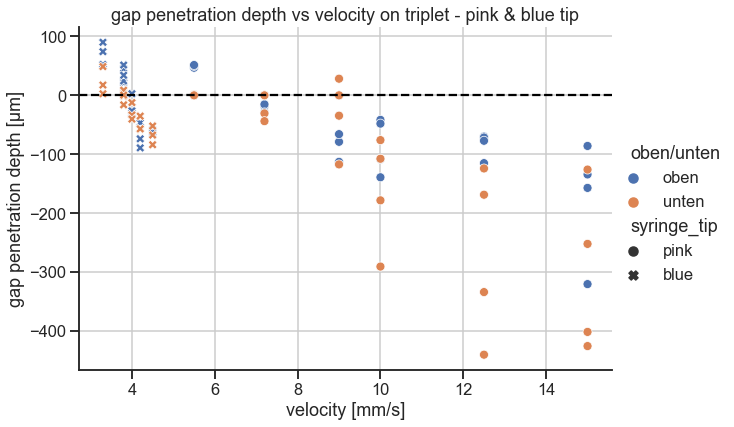

In [9]:
sns.set_context('talk')
g = sns.relplot(data=trip_df, x="vel", y= "gap_relative", hue="oben/unten", style='syringe_tip',
height=6, aspect=1.5)
ax = plt.gca()
ax.axhline(0,c='black', ls='--')
plt.ylabel('gap penetration depth [µm]')
plt.xlabel('velocity [mm/s]')
plt.title('gap penetration depth vs velocity on triplet - pink & blue tip')
plt.grid(True)

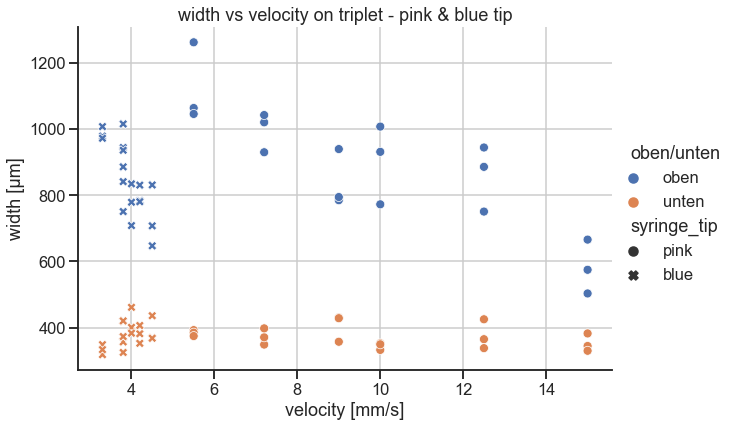

In [10]:
sns.set_context('talk')
g = sns.relplot(data=trip_df, x="vel", y= "glue_width_plane_to_plane µm", hue="oben/unten", style='syringe_tip',
height=6, aspect=1.5)
plt.ylabel('width [µm]')
plt.xlabel('velocity [mm/s]')
plt.title('width vs velocity on triplet - pink & blue tip')
# g.refline(y=0)
plt.grid(True)

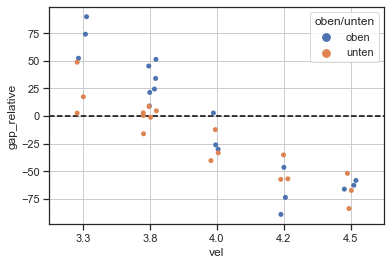

In [11]:
sns.set_context('notebook')
fig, ax = plt.subplots(1,1)
sns.stripplot(data=pd.concat([trip_v6_data,trip_v7_data]), x="vel", y= "gap_relative", hue="oben/unten", ax=ax)
ax.axhline(0,c='black', ls='--')
plt.grid(True)

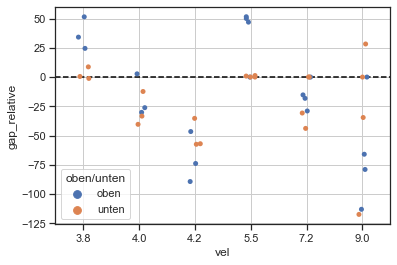

In [12]:
sns.set_context('notebook')
fig, ax = plt.subplots(1,1)
sns.stripplot(data=pd.concat([trip_v7_data,trip_v4_data]), x="vel", y= "gap_relative", hue="oben/unten", ax=ax)
ax.axhline(0,c='black', ls='--')
plt.grid(True)

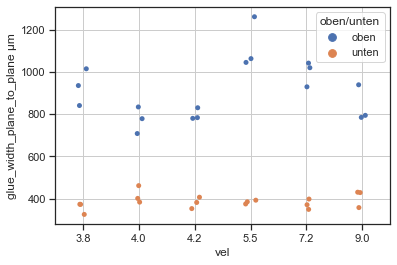

In [13]:
sns.set_context('notebook')
fig, ax = plt.subplots(1,1)
sns.stripplot(data=pd.concat([trip_v7_data,trip_v4_data]), x="vel", y= "glue_width_plane_to_plane µm", hue="oben/unten", ax=ax)
# ax.axhline(0,c='black', ls='--')
plt.grid(True)

Text(0, 0.5, 'width [µm]')

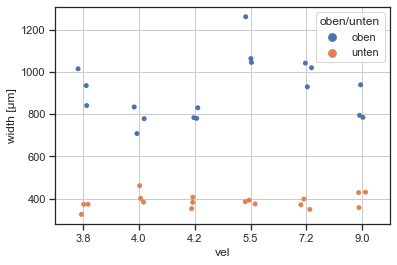

In [14]:
fig, ax = plt.subplots(1, 1)
# sns.stripplot(data=trip_v3_data, x="vel", y= "glue_width_plane_to_plane µm", hue="oben/unten", ax=ax)
# sns.stripplot(data=trip_v4_data, x="vel", y= "glue_width_plane_to_plane µm", hue="oben/unten", ax=ax)
sns.stripplot(data=pd.concat([trip_v7_data,trip_v4_data]), x="vel", y= "glue_width_plane_to_plane µm", hue="oben/unten", ax=ax)
plt.grid(True)
plt.ylabel('width [µm]')

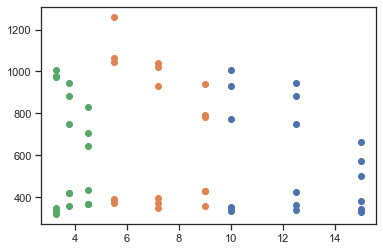

In [15]:
fig, ax = plt.subplots(1, 1)
plt.scatter(trip_v3_data['vel'], trip_v3_data['glue_width_plane_to_plane µm'])
plt.scatter(trip_v4_data['vel'], trip_v4_data['glue_width_plane_to_plane µm'])
plt.scatter(trip_v6_data['vel'], trip_v6_data['glue_width_plane_to_plane µm'])